# Ejercicio 1: Análisis Exploratorio de Datos

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

precios_2021 = pd.read_excel('PRECIOS 2021.xlsx', engine='openpyxl')
precios_2022 = pd.read_excel('PRECIOS 2022.xlsx', engine='openpyxl')
precios_2023 = pd.read_excel('PRECIOS 2023.xlsx', engine='openpyxl')
precios_2024 = pd.read_excel('PRECIOS 2024.xlsx', engine='openpyxl')

consumo = pd.read_excel('CONSUMO.xlsx', engine='openpyxl')
importacion = pd.read_excel('IMPORTACION.xlsx', engine='openpyxl')

In [54]:
# Unificar datos de precios
precios = pd.concat([precios_2021, precios_2022, precios_2023, precios_2024], ignore_index=True)

# Convertir columnas de fecha a datetime
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b/%Y')
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'], format='%b/%Y')
precios['FECHA'] = pd.to_datetime(precios['FECHA'], format='%d/%b/%Y')

In [55]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.476190,1426.0,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0,1.750545e+06
1,2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.552381,1458.0,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0,1.773220e+06
2,2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.066667,1503.0,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0,1.909499e+06
3,2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.607143,1561.0,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0,1.800933e+06
4,2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.147619,1642.0,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0,1.941772e+06


In [56]:
importacion.head()


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.738095,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402,0.0,715344,2.312639e+06
1,2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.380952,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0,0.0,370166,1.769209e+06
2,2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.371429,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0,0.0,360530,1.945770e+06
3,2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.642857,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184,0.0,359527,1.623638e+06
4,2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.861905,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680,0.0,723346,2.262727e+06


In [57]:
precios.head()

,FECHA,Tipo de Cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.
0,2021-01-01,7.79382,21.91,21.11,17.61,13.40,99.0
1,2021-01-02,7.79382,21.91,21.11,17.61,13.40,99.0
2,2021-01-03,7.79382,21.91,21.11,17.61,13.40,99.0
3,2021-01-04,7.79417,21.91,21.11,17.61,13.45,99.0
4,2021-01-05,7.79369,21.91,21.11,17.61,13.45,99.0


In [58]:
consumo_seleccionado = consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_seleccionado = importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_seleccionado = precios[['FECHA', 'Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']]


In [59]:
consumo_seleccionado.set_index('Fecha', inplace=True)
importacion_seleccionado.set_index('Fecha', inplace=True)
precios_seleccionado.set_index('FECHA', inplace=True)

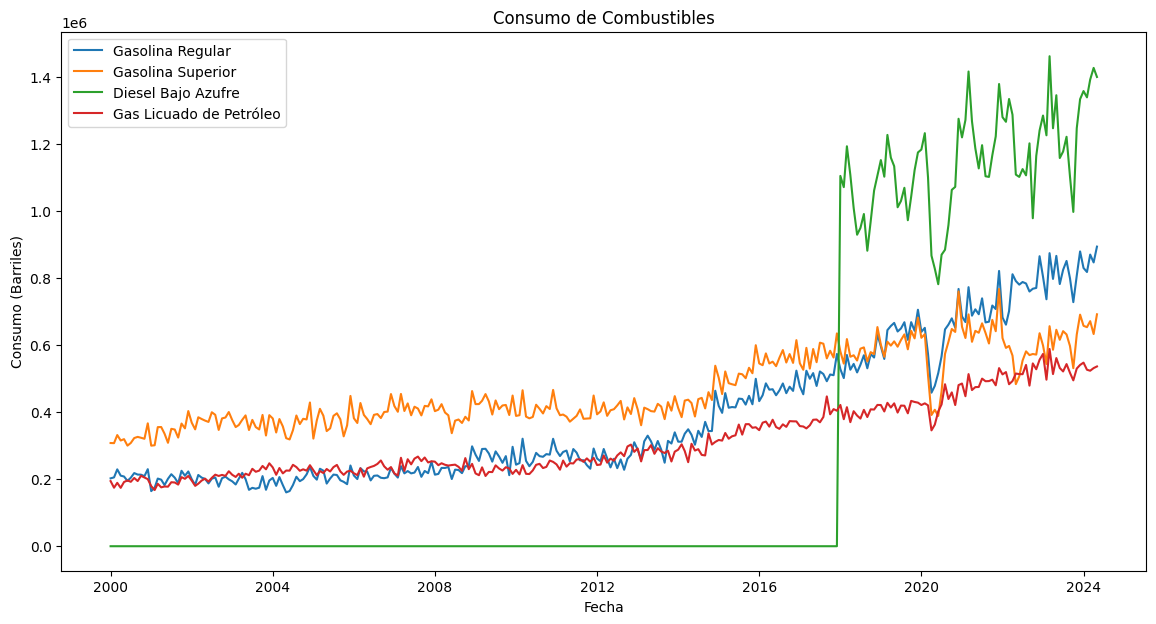

In [60]:
# Gráficos de consumo
plt.figure(figsize=(14, 7))
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gasolina superior'], label='Gasolina Superior')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Consumo de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo (Barriles)')
plt.legend()
plt.show()

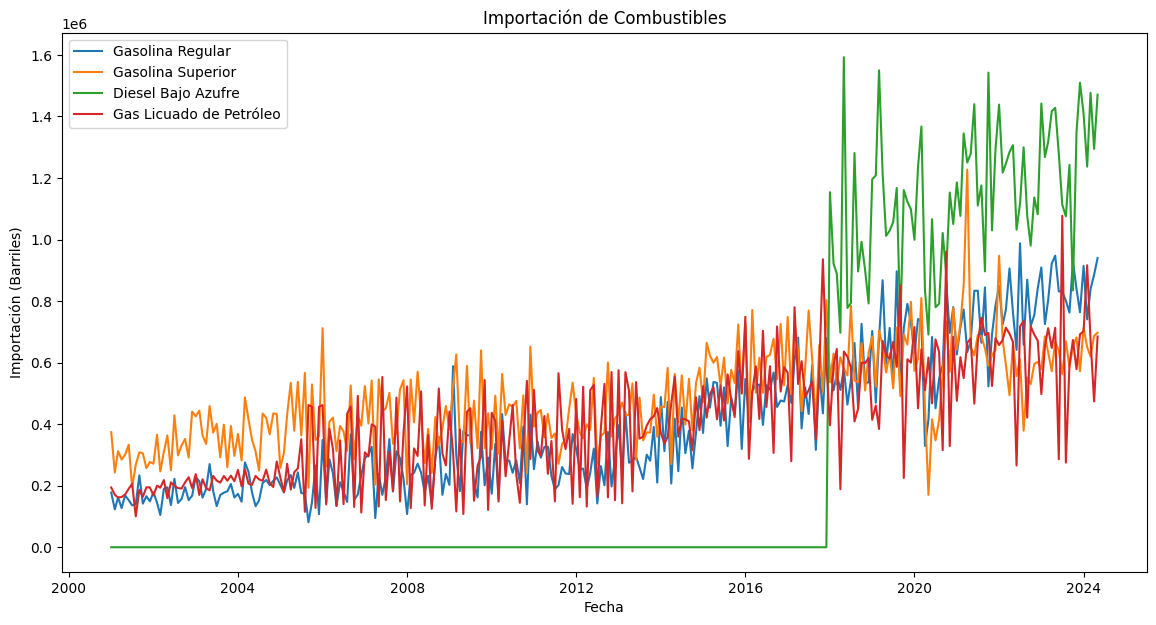

In [61]:
# Gráficos de importación
plt.figure(figsize=(14, 7))
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gasolina regular'], label='Gasolina Regular')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gasolina superior'], label='Gasolina Superior')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Importación de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Importación (Barriles)')
plt.legend()
plt.show()

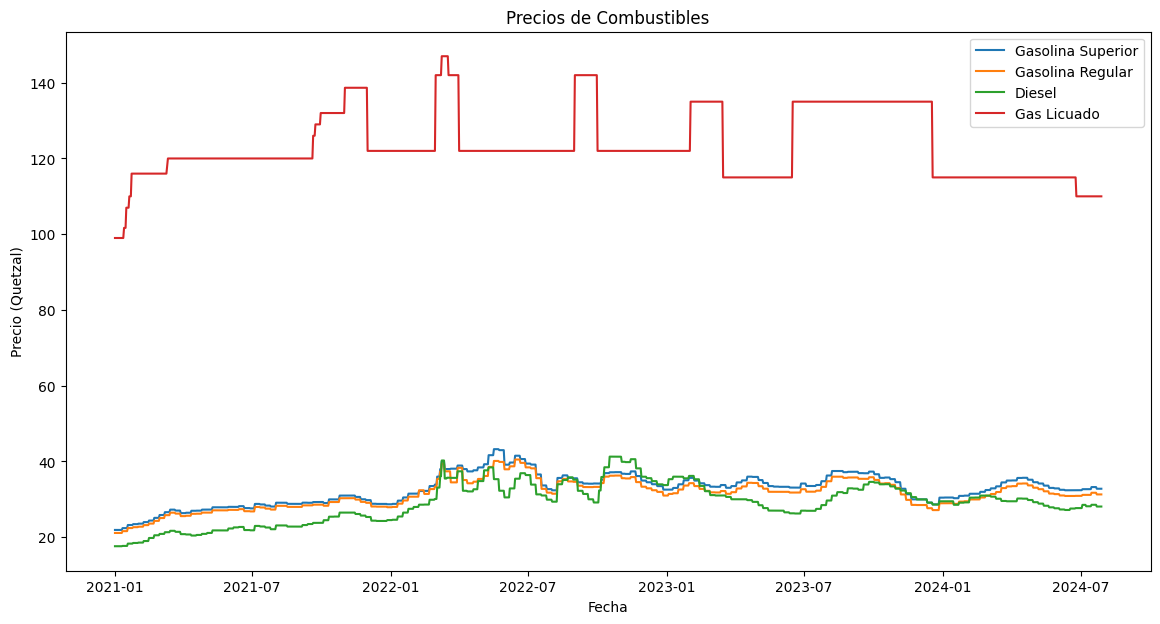

In [62]:
# Gráficos de precios
plt.figure(figsize=(14, 7))
plt.plot(precios_seleccionado.index, precios_seleccionado['Superior'], label='Gasolina Superior')
plt.plot(precios_seleccionado.index, precios_seleccionado['Regular'], label='Gasolina Regular')
plt.plot(precios_seleccionado.index, precios_seleccionado['Diesel'], label='Diesel')
plt.plot(precios_seleccionado.index, precios_seleccionado['Glp Cilindro 25Lbs.'], label='Gas Licuado')
plt.title('Precios de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Precio (Quetzal)')
plt.legend()
plt.show()

In [63]:
consumo_seleccionado.describe()

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
count,293.000000,293.000000,2.930000e+02,293.000000
mean,386490.157486,464562.247013,3.014601e+05,312350.791082
std,209541.304568,108349.195858,5.115677e+05,109315.234878
min,160741.900000,300242.781667,0.000000e+00,167818.137897
25%,214509.650000,382078.880000,0.000000e+00,225886.426190
50%,285089.040000,420238.710000,0.000000e+00,262255.138095
75%,524242.310000,565665.720000,8.703549e+05,393901.921429
max,894533.140000,768102.830000,1.463008e+06,588892.160000


In [64]:
importacion_seleccionado.describe()


,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
count,281.000000,2.810000e+02,2.810000e+02,2.810000e+02
mean,401433.017451,4.853736e+05,3.135770e+05,4.091257e+05
std,234159.202453,1.539939e+05,5.242396e+05,1.973531e+05
min,81015.300000,1.702925e+05,0.000000e+00,1.005615e+05
25%,205624.080000,3.668863e+05,0.000000e+00,2.252070e+05
50%,320566.690000,4.704840e+05,0.000000e+00,4.100011e+05
75%,548714.530000,5.958704e+05,7.921987e+05,5.656279e+05
max,987872.050000,1.227174e+06,1.592580e+06,1.077123e+06


In [65]:
precios_seleccionado.describe()


,Superior,Regular,Diesel,Glp Cilindro 25Lbs.
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,32.652460,31.402605,28.988874,123.245295
std,4.117072,3.836911,5.313549,8.972130
min,21.910000,21.110000,17.610000,99.000000
25%,29.270000,28.490000,25.410000,115.000000
50%,33.080000,31.780000,29.370000,122.000000
75%,35.640000,34.160000,32.650000,132.000000
max,43.240000,40.500000,41.270000,147.000000


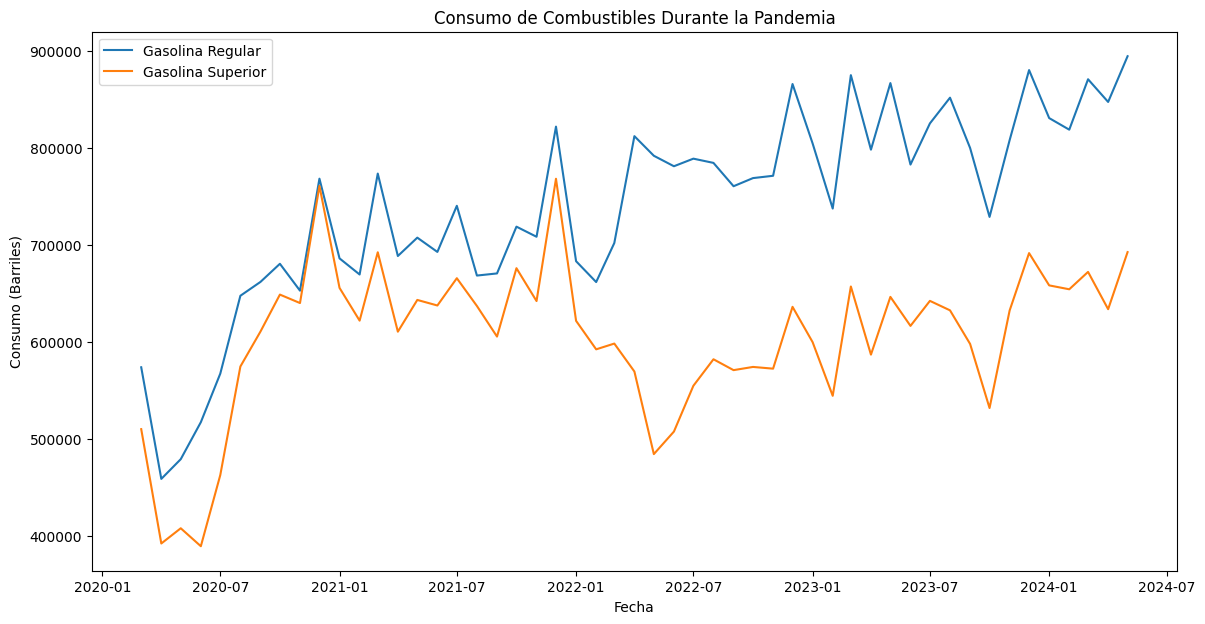

In [66]:
# Filtrar datos de la pandemia (marzo 2020 en adelante)
inicio_pandemia = '2020-03-01'
fin_pandemia = '2024-05-31'

consumo_pandemia = consumo_seleccionado[inicio_pandemia:fin_pandemia]
importacion_pandemia = importacion_seleccionado[inicio_pandemia:fin_pandemia]
precios_pandemia = precios_seleccionado[inicio_pandemia:fin_pandemia]

# Gráficos de pandemia
plt.figure(figsize=(14, 7))
plt.plot(consumo_pandemia.index, consumo_pandemia['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_pandemia.index, consumo_pandemia['Gasolina superior'], label='Gasolina Superior')
plt.title('Consumo de Combustibles Durante la Pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (Barriles)')
plt.legend()
plt.show()


# 2. Análisis de Series Temporales

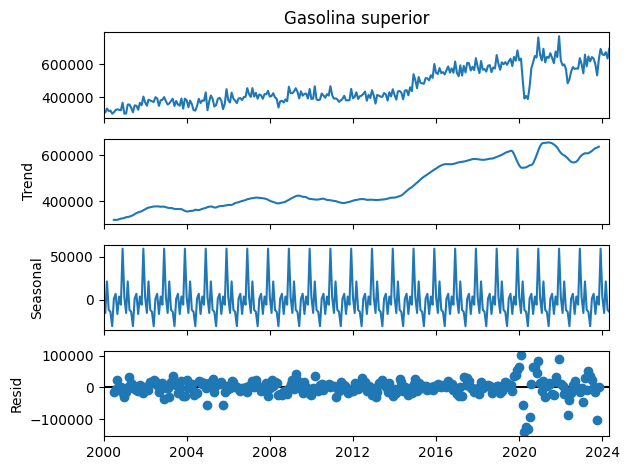

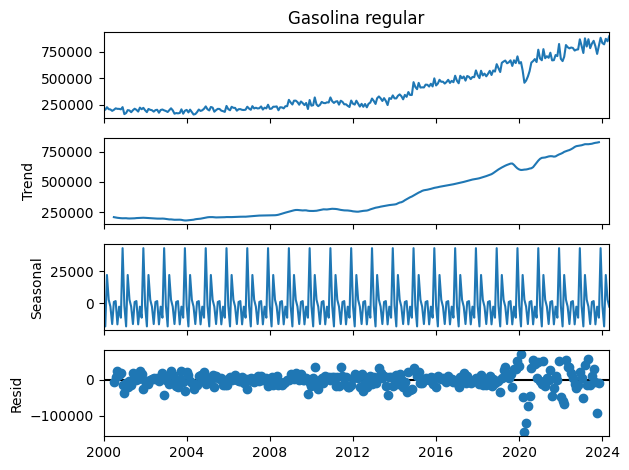

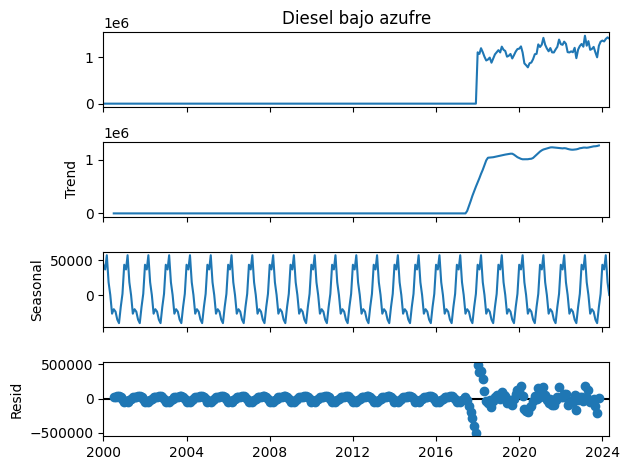

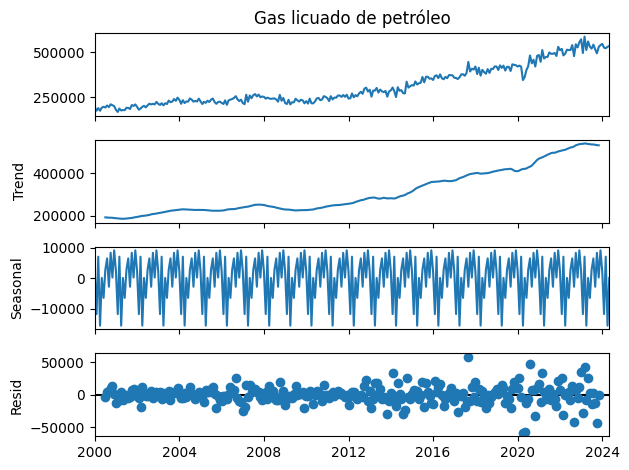

In [67]:
# Selección de series
serie_gasolina_super = consumo_seleccionado['Gasolina superior']
serie_gasolina_regular = consumo_seleccionado['Gasolina regular']
serie_diesel = consumo_seleccionado['Diesel bajo azufre']
serie_gas_lp = consumo_seleccionado['Gas licuado de petróleo']

# Series de importación
serie_gasolina_super_import = importacion_seleccionado['Gasolina superior']
serie_gasolina_regular_import = importacion_seleccionado['Gasolina regular']
serie_diesel_import = importacion_seleccionado['Diesel bajo azufre']
serie_gas_lp_import = importacion_seleccionado['Gas licuado de petróleo']

# Series de precios
serie_gasolina_super_precios = precios_seleccionado['Superior']
serie_gasolina_regular_precios = precios_seleccionado['Regular']
serie_diesel_precios = precios_seleccionado['Diesel']
serie_gas_lp_precios = precios_seleccionado['Glp Cilindro 25Lbs.']

# Descomposición
def descomponer_serie(serie):
    decomposition = seasonal_decompose(serie.dropna(), model='additive')
    decomposition.plot()
    plt.show()
    return decomposition

# Descomposición de series
decomp_gasolina_super = descomponer_serie(serie_gasolina_super)
decomp_gasolina_regular = descomponer_serie(serie_gasolina_regular)
decomp_diesel = descomponer_serie(serie_diesel)
decomp_gas_lp = descomponer_serie(serie_gas_lp)


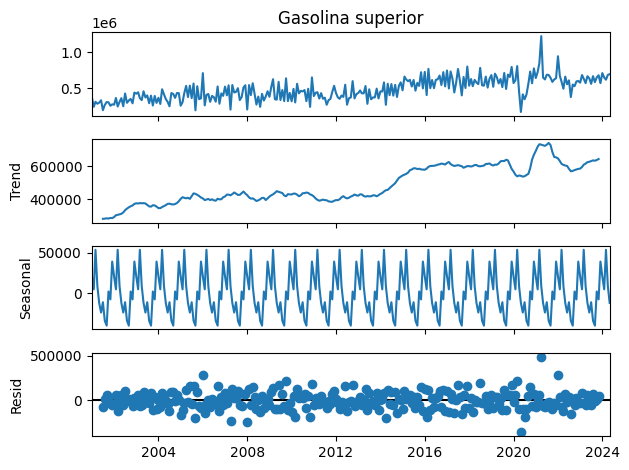

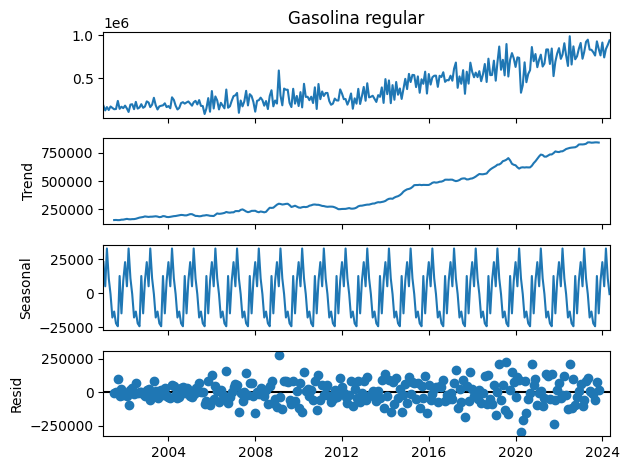

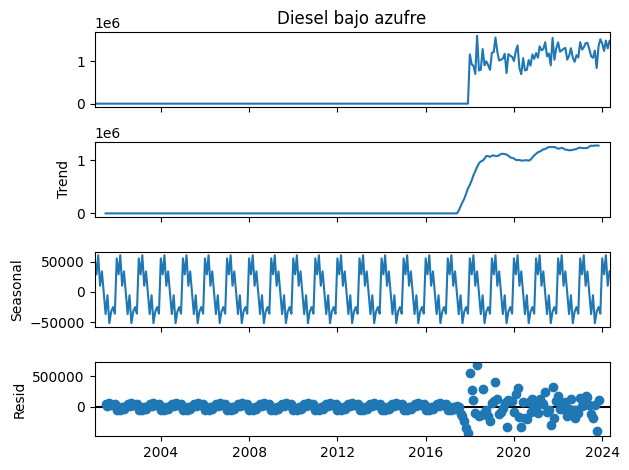

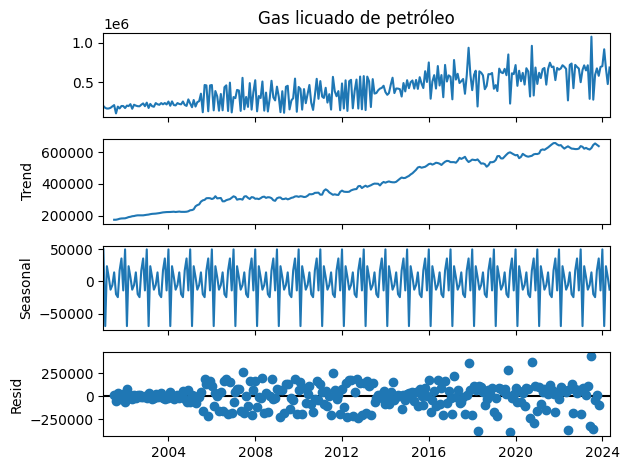

In [68]:
# Descomponer series de importación
decomp_gasolina_super_import = descomponer_serie(serie_gasolina_super_import)
decomp_gasolina_regular_import = descomponer_serie(serie_gasolina_regular_import)
decomp_diesel_import = descomponer_serie(serie_diesel_import)
decomp_gas_lp_import = descomponer_serie(serie_gas_lp_import)

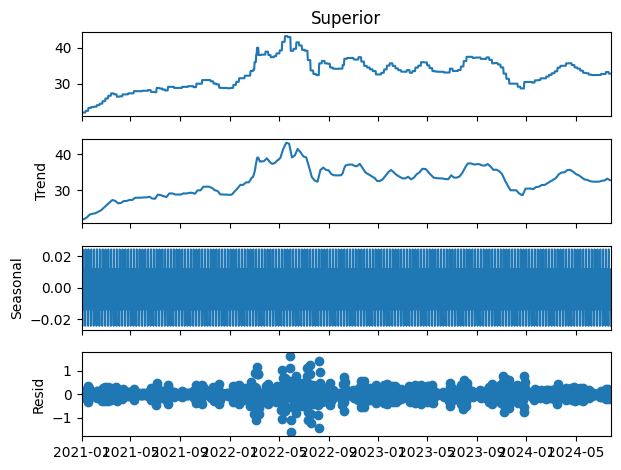

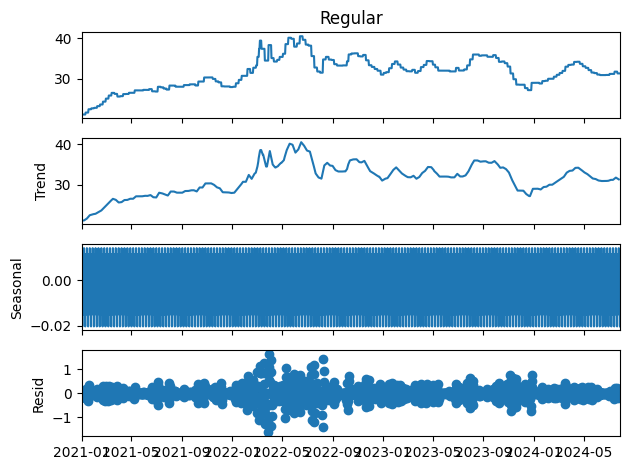

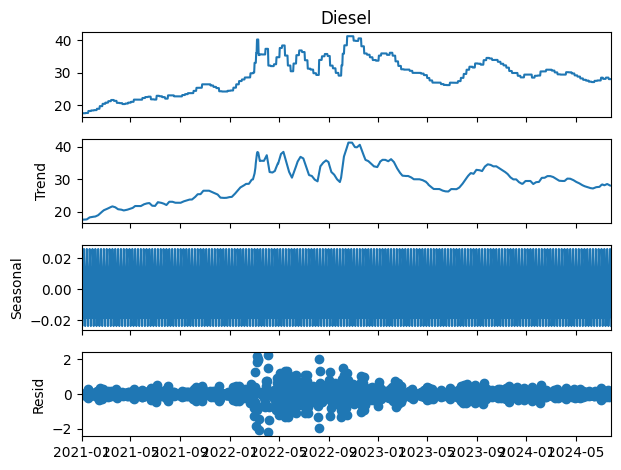

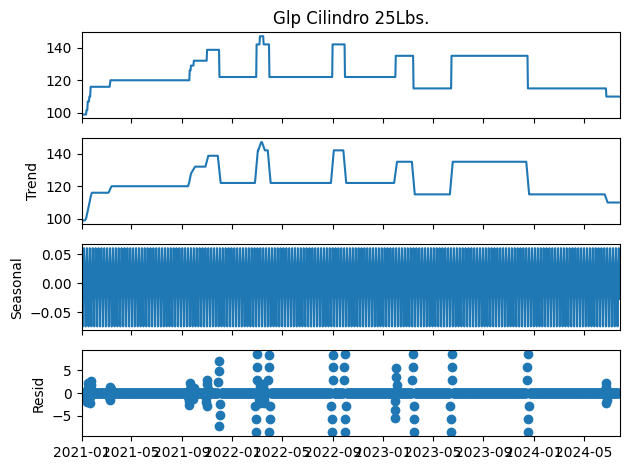

In [69]:
# Descomponer series de precios
decomp_gasolina_super_precios = descomponer_serie(serie_gasolina_super_precios)
decomp_gasolina_regular_precios = descomponer_serie(serie_gasolina_regular_precios)
decomp_diesel_precios = descomponer_serie(serie_diesel_precios)
decomp_gas_lp_precios = descomponer_serie(serie_gas_lp_precios)

In [70]:
# Prueba de Dickey-Fuller aumentada
def prueba_dickey_fuller(serie):
    result = adfuller(serie.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Aplicar prueba
print("Gasolina Superior")
prueba_dickey_fuller(serie_gasolina_super)
print("\nGasolina Regular")
prueba_dickey_fuller(serie_gasolina_regular)
print("\nDiesel")
prueba_dickey_fuller(serie_diesel)
print("\nGas Licuado")
prueba_dickey_fuller(serie_gas_lp)


Gasolina Superior
ADF Statistic: -0.678782983415471
p-value: 0.8521689503946173
Critical Values: {'1%': -3.453922368485787, '5%': -2.871918329081633, '10%': -2.5723001147959184}

Gasolina Regular
ADF Statistic: 2.712413649239667
p-value: 0.9990875733155129
Critical Values: {'1%': -3.4540935579190495, '5%': -2.8719934111688965, '10%': -2.5723401594120388}

Diesel
ADF Statistic: -0.41563265649760106
p-value: 0.9074557821510758
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}

Gas Licuado
ADF Statistic: 0.8662148782601518
p-value: 0.9926331955934964
Critical Values: {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}


In [71]:
# Aplicar prueba a importación
print("Gasolina Superior")
prueba_dickey_fuller(serie_gasolina_super_import)
print("\nGasolina Regular")
prueba_dickey_fuller(serie_gasolina_regular_import)
print("\nDiesel")
prueba_dickey_fuller(serie_diesel_import)
print("\nGas Licuado")
prueba_dickey_fuller(serie_gas_lp_import)


Gasolina Superior
ADF Statistic: -2.9329528457978373
p-value: 0.0416480372802758
Critical Values: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

Gasolina Regular
ADF Statistic: 0.8288289928204918
p-value: 0.992087554110633
Critical Values: {'1%': -3.4547128138328875, '5%': -2.8722649771800155, '10%': -2.5724850011573914}

Diesel
ADF Statistic: 0.07713436090655604
p-value: 0.9644648276674772
Critical Values: {'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}

Gas Licuado
ADF Statistic: -0.4023060241400737
p-value: 0.9097130413332856
Critical Values: {'1%': -3.454988209954765, '5%': -2.8723857312734613, '10%': -2.572549407997327}


In [72]:
# Aplicar prueba a precios
print("Gasolina Superior")
prueba_dickey_fuller(serie_gasolina_super_precios)
print("\nGasolina Regular")
prueba_dickey_fuller(serie_gasolina_regular_precios)
print("\nDiesel")
prueba_dickey_fuller(serie_diesel_precios)
print("\nGas Licuado")
prueba_dickey_fuller(serie_gas_lp_precios)

Gasolina Superior
ADF Statistic: -2.939922084393963
p-value: 0.040898674582740956
Critical Values: {'1%': -3.435401880796999, '5%': -2.863770985550096, '10%': -2.567957791647768}

Gasolina Regular
ADF Statistic: -2.716703101254144
p-value: 0.07119223291755004
Critical Values: {'1%': -3.4354451795550935, '5%': -2.863790090661305, '10%': -2.567967966012737}

Diesel
ADF Statistic: -2.3814310039658784
p-value: 0.14704610196730916
Critical Values: {'1%': -3.435457117423131, '5%': -2.863795358068796, '10%': -2.567970771161219}

Gas Licuado
ADF Statistic: -3.709047813682011
p-value: 0.00398767355942892
Critical Values: {'1%': -3.435374708138995, '5%': -2.863758995766637, '10%': -2.5679514065499265}


## Evaluación de los modelos Arima obtenidos con la función autoarima
- AIC y BIC: Los modelos con menor AIC y BIC son preferidos ya que indican un mejor ajuste con menos complejidad. Los modelos seleccionados tienen los valores de AIC y BIC más bajos en comparación con los otros modelos evaluados, lo cual es una buena señal.

- Autocorrelación en los Residuos: El test de Ljung-Box muestra que no hay autocorrelaciones significativas en la mayoría de los modelos, lo cual es positivo. Esto sugiere que los residuos no tienen patrones sistemáticos no capturados por el modelo.

- Normalidad de los Residuos: Los tests de Jarque-Bera indican que los residuos no siguen una distribución normal. Esto puede ser un problema, especialmente si se requiere normalidad para ciertas aplicaciones, aunque en muchos casos de ARIMA, esto no es un impedimento grave.

- Heteroskedasticidad: Los resultados de heterocedasticidad muestran problemas en algunos modelos (por ejemplo, Diesel). La heterocedasticidad puede indicar que la variabilidad en los datos cambia con el tiempo, lo cual puede no estar bien modelado por un ARIMA simple.

In [73]:

import pmdarima as pm
# Verificar si las series temporales contienen NaNs
def verificar_y_limpiar_serie(serie, nombre):
    if serie.isnull().any():
        print(f"La serie temporal {nombre} contiene NaNs. Limpiando...")
        serie = serie.dropna()
    return serie

# Ajustar modelos SARIMA con datos de entrenamiento
def aplicar_auto_arima(serie, nombre, periodo_estacional):
    serie = verificar_y_limpiar_serie(serie, nombre)
    modelo = pm.auto_arima(
        serie,
        seasonal=True,
        m=periodo_estacional,
        trace=True,
        error_action='ignore',
        suppress_warnings=True
    )
    print(f'Modelo seleccionado para {nombre}:')
    print(modelo.summary())
    return modelo

# Ajustar los modelos SARIMA a tus series temporales
modelo_gasolina_super_sarima = aplicar_auto_arima(serie_gasolina_super, "Gasolina Superior", periodo_estacional=12)
modelo_gasolina_regular_sarima = aplicar_auto_arima(serie_gasolina_regular, "Gasolina Regular", periodo_estacional=12)
modelo_diesel_sarima = aplicar_auto_arima(serie_diesel, "Diesel", periodo_estacional=12)
modelo_gas_lp_sarima = aplicar_auto_arima(serie_gas_lp, "Gas Licuado", periodo_estacional=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7055.620, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6966.880, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6980.648, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7053.902, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7017.495, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=6949.905, Time=0.67 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=6940.367, Time=0.36 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6941.122, Time=0.10 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=6937.960, Time=0.54 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=6941.379, Time=0.22 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=6961.199, Time=0.37 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=6936.744, Time=0.73 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=6940.956, Time=0.30 sec
 ARIMA(2,1,0)(2,0,1)[12]

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6578.599, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6685.516, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6588.673, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6587.576, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6684.308, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6583.690, Time=0.38 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6583.476, Time=0.31 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6571.039, Time=1.23 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6569.320, Time=1.27 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=6569.663, Time=0.80 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=6573.897, Time=0.36 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=6575.658, Time=0.87 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=6572.033, Time=0.32 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=6570.935, Time=2.15 sec


### Consideraciones:

- La matriz de covarianza es singular o casi singular, lo que puede indicar que los errores estándar pueden ser inestables.
- El modelo tiene un valor de AIC más bajo en comparación con otros modelos evaluados, lo que sugiere que es uno de los modelos más adecuados basados en este criterio.


### Análisis y Conclusiones:

1. **Estacionalidad y Diferenciación:**
   - Los valores ADF para todos los combustibles son elevados, indicando que no son estacionarios, lo que sugiere que la diferenciación aplicada en el modelo es necesaria y adecuada. El modelo SARIMAX(3, 1, 3)x(2, 0, [], 12) intenta capturar tanto la estacionalidad (con el término estacional (2, 0, [], 12)) como la tendencia (con la diferenciación (1)).

2. **AIC y BIC:**
   - El modelo seleccionado tiene el valor más bajo de AIC en comparación con los modelos alternativos. Esto indica que el modelo tiene un buen ajuste en términos de penalización por complejidad. El BIC también es razonablemente bajo, pero es más estricto en la penalización por la complejidad del modelo, sugiriendo que el modelo puede ser adecuado pero con cierta complejidad.

3. **Coeficientes del Modelo:**
   - Los coeficientes AR y MA son significativos en su mayoría, lo que indica que el modelo captura bien la dinámica temporal. Sin embargo, la inestabilidad en la matriz de covarianza sugiere que los errores estándar de algunos coeficientes pueden ser poco fiables.

4. **Pruebas de Raíces Unitarias:**
   - Todos los series temporales parecen no ser estacionarias, lo que valida la elección del modelo SARIMAX con diferenciación.

In [74]:
def aplicar_auto_sarima(serie, nombre, periodo_estacional):
    """
    Ajusta un modelo SARIMA a la serie temporal dada y muestra un resumen del modelo seleccionado.

    Parameters:
    - serie: Serie temporal a ajustar.
    - nombre: Nombre para identificar la serie temporal.
    - periodo_estacional: Periodo estacional de la serie temporal (por ejemplo, 12 para datos mensuales con estacionalidad anual).

    Returns:
    - modelo: El modelo SARIMA ajustado.
    """
    modelo = pm.auto_arima(
        serie,
        seasonal=True,           # Ajusta un modelo SARIMA
        m=periodo_estacional,   # Periodo estacional
        trace=True,             # Muestra el progreso del ajuste
        error_action='ignore',  # Ignora errores durante el ajuste
        suppress_warnings=True  # Suprime advertencias durante el ajuste
    )
    print(f'Modelo seleccionado para {nombre}:')
    print(modelo.summary())
    return modelo

# Aplica la función a tus series temporales con el periodo estacional adecuado (por ejemplo, 12 para datos mensuales)
modelo_gasolina_super_sarima = aplicar_auto_sarima(serie_gasolina_super, "Gasolina Superior", periodo_estacional=12)
modelo_gasolina_regular_sarima = aplicar_auto_sarima(serie_gasolina_regular, "Gasolina Regular", periodo_estacional=12)
modelo_diesel_sarima = aplicar_auto_sarima(serie_diesel, "Diesel", periodo_estacional=12)
modelo_gas_lp_sarima = aplicar_auto_sarima(serie_gas_lp, "Gas Licuado", periodo_estacional=12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7055.620, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6966.880, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6980.648, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7053.902, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7017.495, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=6949.905, Time=0.21 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=6940.367, Time=0.32 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6941.122, Time=0.12 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=6937.960, Time=0.59 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=6941.379, Time=0.25 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=6961.199, Time=0.55 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=6936.744, Time=0.82 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=6940.956, Time=0.33 sec
 ARIMA(2,1,0)(2,0,1)[12]

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6578.599, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6685.516, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6588.673, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6587.576, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6684.308, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6583.690, Time=0.23 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6583.476, Time=0.27 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6571.039, Time=1.18 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=6569.320, Time=1.93 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=6569.663, Time=0.58 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=6573.897, Time=0.40 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=6575.658, Time=0.88 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=6572.033, Time=0.28 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=6570.935, Time=0.67 sec


### Mejores modelos encontrados

- **Gas Licuado**: El modelo ARIMA(3,1,3)(2,0,0)[12] tiene el menor AIC (6557.751) y BIC (6594.518) entre los modelos considerados, lo que sugiere que es el mejor modelo en términos de ajuste a los datos.
- **Gasolina Superior**: El modelo ARIMA(2,1,0)(1,0,[1],12) tiene el menor AIC (6925.962) y BIC (6944.346) entre los modelos considerados para esta serie temporal, lo que lo hace el mejor modelo para esta serie.


In [75]:
# Ajustar modelos ARIMA a importación
modelo_gasolina_super_import = aplicar_auto_arima(serie_gasolina_super_import, "Gasolina Superior (Importación)", periodo_estacional=12)
modelo_gasolina_regular_import = aplicar_auto_arima(serie_gasolina_regular_import, "Gasolina Regular (Importación)", periodo_estacional=12)
modelo_diesel_import = aplicar_auto_arima(serie_diesel_import, "Diesel (Importación)", periodo_estacional=12)
modelo_gas_lp_import = aplicar_auto_arima(serie_gas_lp_import, "Gas Licuado (Importación)", periodo_estacional=12)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7505.320, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7353.183, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7321.844, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7503.337, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7320.094, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=7321.095, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7307.188, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=7308.436, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7308.689, Time=0.14 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=7309.480, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7352.060, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=7304.095, Time=0.08 sec
 ARIMA(2,1,1)(1,0,0)[12] inte

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7685.466, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7512.718, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7441.782, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7683.485, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7443.539, Time=0.64 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=7441.063, Time=1.78 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=7686.654, Time=0.74 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=7369.124, Time=0.45 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7368.646, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7368.332, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=7370.250, Time=0.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0

In [76]:
# Ajustar modelos SARIMA a importación
modelo_gasolina_super_import_sarima = aplicar_auto_sarima(serie_gasolina_super_import, "Gasolina Superior (Importación)", periodo_estacional=12)
modelo_gasolina_regular_import_sarima = aplicar_auto_sarima(serie_gasolina_regular_import, "Gasolina Regular (Importación)", periodo_estacional=12)
modelo_diesel_import_sarima = aplicar_auto_sarima(serie_diesel_import, "Diesel (Importación)", periodo_estacional=12)
modelo_gas_lp_import_sarima = aplicar_auto_sarima(serie_gas_lp_import, "Gas Licuado (Importación)", periodo_estacional=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7505.320, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7353.183, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7321.844, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7503.337, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7320.094, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=7321.095, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7307.188, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=7308.436, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7308.689, Time=0.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=7309.480, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7352.060, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=7304.095, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0)[12] inte

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7685.466, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7512.718, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7441.782, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7683.485, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7443.539, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=7441.063, Time=0.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=7686.654, Time=0.09 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=7369.124, Time=0.23 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=7368.646, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7368.332, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=7370.250, Time=0.08 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0

In [77]:
# Ajustar modelos ARIMA a precios
modelo_gasolina_super_precios = aplicar_auto_arima(serie_gasolina_super_precios, "Gasolina Superior (Precios)", periodo_estacional=12)
modelo_gasolina_regular_precios = aplicar_auto_arima(serie_gasolina_regular_precios, "Gasolina Regular (Precios)", periodo_estacional=12)
modelo_diesel_precios = aplicar_auto_arima(serie_diesel_precios, "Diesel (Precios)", periodo_estacional=12)
modelo_gas_lp_precios = aplicar_auto_arima(serie_gas_lp_precios, "Gas Licuado (Precios)", periodo_estacional=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=776.595, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=774.698, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=778.697, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=778.697, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=773.556, Time=0.07 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=776.697, Time=0.72 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=776.697, Time=0.60 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=778.697, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=776.697, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=776.697, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=778.676, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 5.435 seconds
Modelo seleccionado para Gasolina Superior (Precios):
                               SARIMAX Results                                
Dep. Variable:      

In [78]:
# Ajustar modelos SARIMA a precios
modelo_gasolina_super_precios_sarima = aplicar_auto_sarima(serie_gasolina_super_precios, "Gasolina Superior (Precios)", periodo_estacional=12)
modelo_gasolina_regular_precios_sarima = aplicar_auto_sarima(serie_gasolina_regular_precios, "Gasolina Regular (Precios)", periodo_estacional=12)
modelo_diesel_precios_sarima = aplicar_auto_sarima(serie_diesel_precios, "Diesel (Precios)", periodo_estacional=12)
modelo_gas_lp_precios_sarima = aplicar_auto_sarima(serie_gas_lp_precios, "Gas Licuado (Precios)", periodo_estacional=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=776.595, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=774.698, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=778.697, Time=0.98 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=778.697, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=773.556, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=776.697, Time=0.38 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=776.697, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=778.697, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=776.697, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=776.697, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=778.676, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 6.857 seconds
Modelo seleccionado para Gasolina Superior (Precios):
                               SARIMAX Results                                
Dep. Variable:      

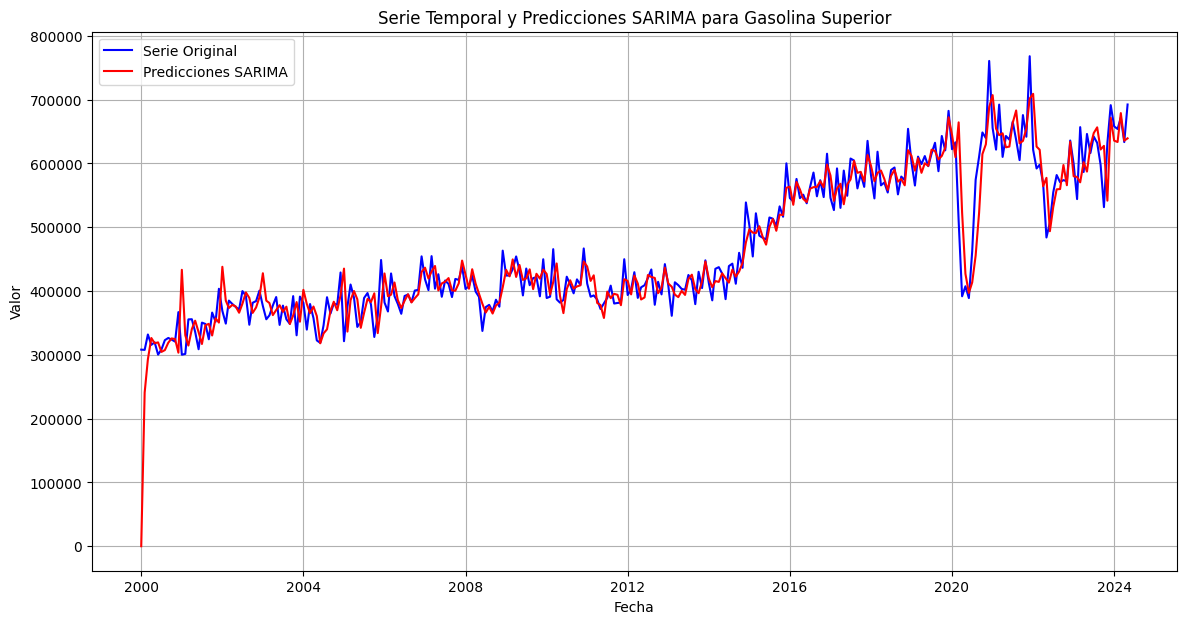

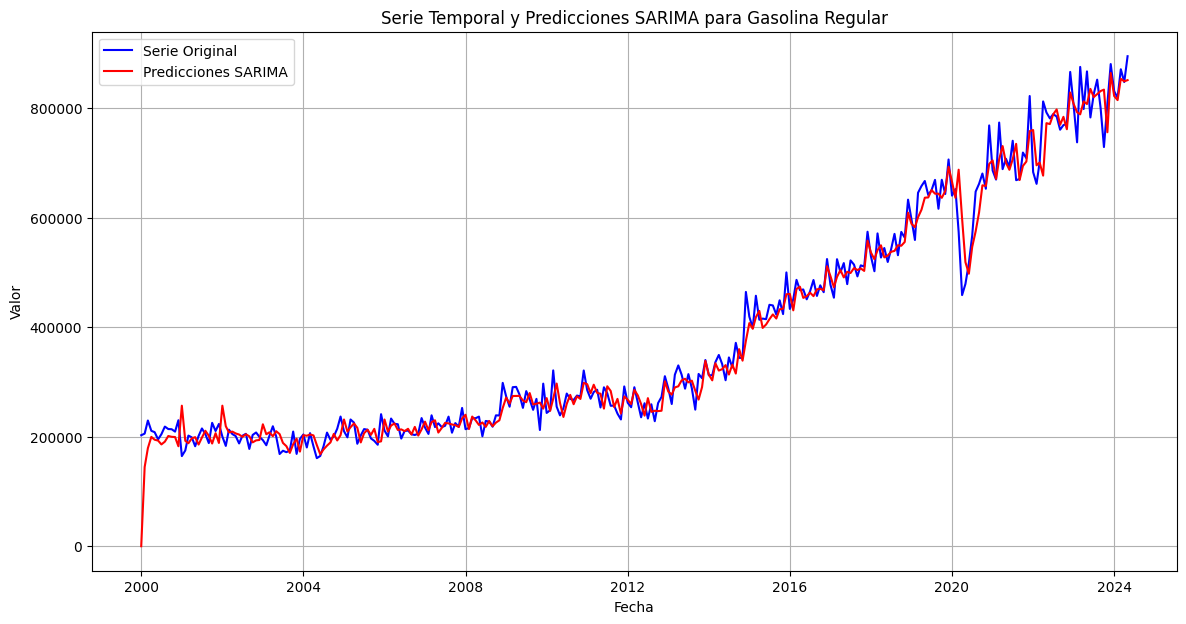

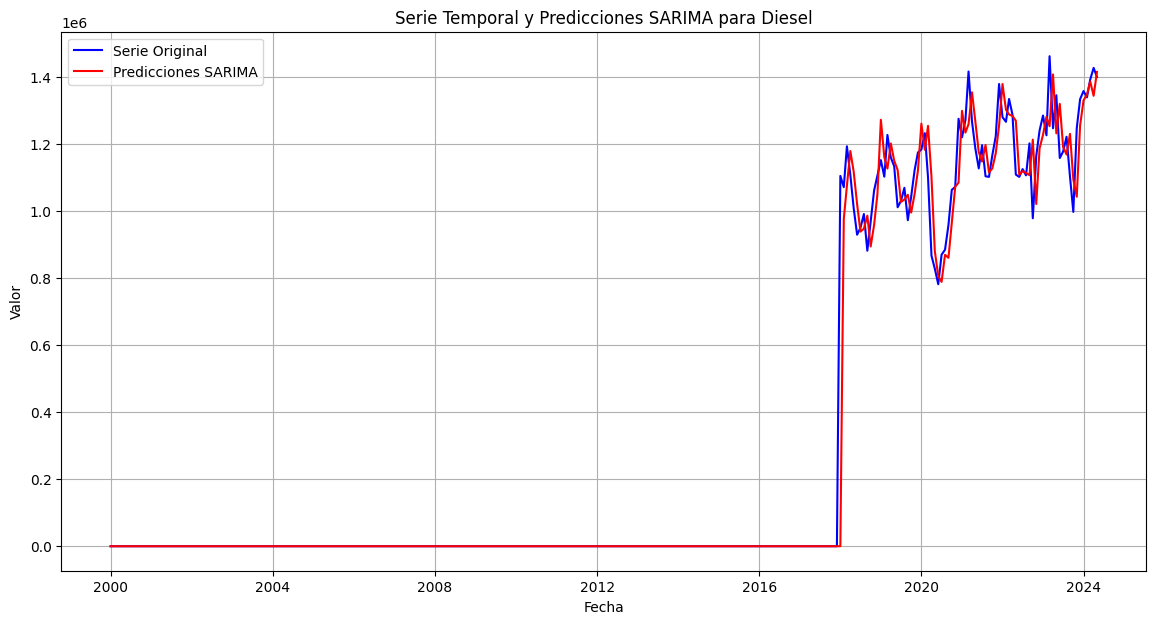

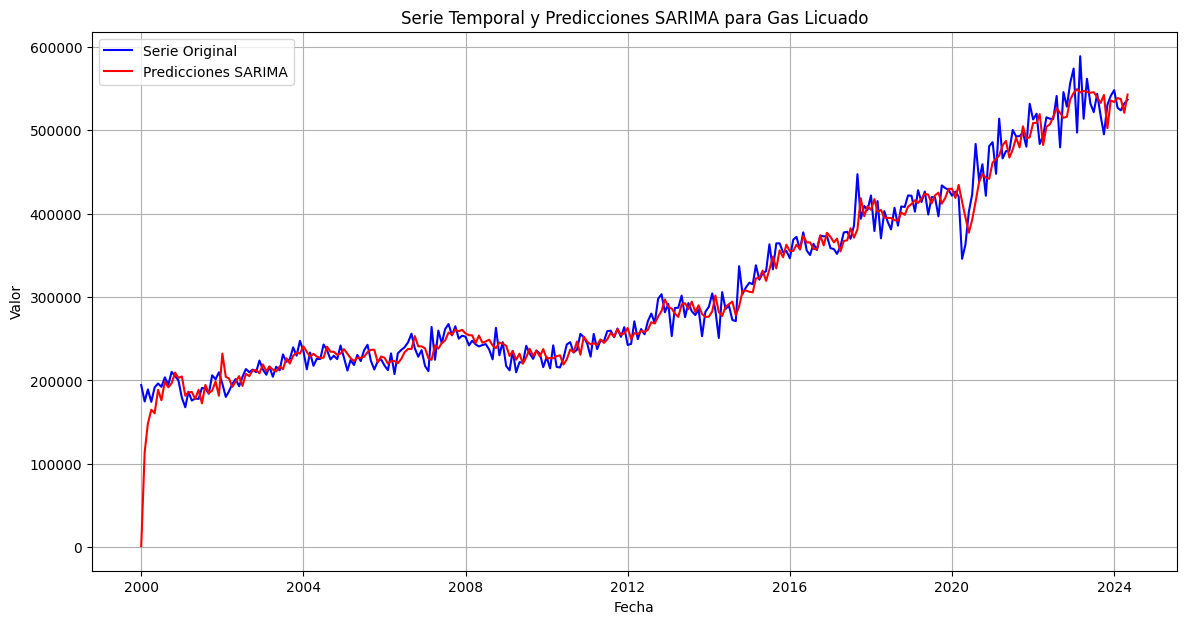

In [ ]:
def graficar_ajustes(serie, modelo, nombre):
    """
    Grafica la serie temporal original y las predicciones del modelo SARIMA.

    Parameters:
    - serie: Serie temporal original.
    - modelo: Modelo SARIMA ajustado.
    - nombre: Nombre para identificar la serie temporal.
    """
    # Predicciones en la serie temporal
    predicciones = modelo.predict_in_sample()
    
    # Graficar la serie original y las predicciones
    plt.figure(figsize=(14, 7))
    plt.plot(serie.index, serie, label='Serie Original', color='blue')
    plt.plot(serie.index, predicciones, label='Predicciones SARIMA', color='red')
    
    # Añadir título y etiquetas
    plt.title(f'Serie Temporal y Predicciones SARIMA para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar cada serie temporal con su modelo SARIMA ajustado
graficar_ajustes(serie_gasolina_super, modelo_gasolina_super_sarima, "Gasolina Superior")
graficar_ajustes(serie_gasolina_regular, modelo_gasolina_regular_sarima, "Gasolina Regular")
graficar_ajustes(serie_diesel, modelo_diesel_sarima, "Diesel")
graficar_ajustes(serie_gas_lp, modelo_gas_lp_sarima, "Gas Licuado")

In [ ]:
# Graficar cada serie temporal de importación con su modelo SARIMA ajustado
graficar_ajustes(serie_gasolina_super_import, modelo_gasolina_super_import_sarima, "Gasolina Superior (Importación)")
graficar_ajustes(serie_gasolina_regular_import, modelo_gasolina_regular_import_sarima, "Gasolina Regular (Importación)")
graficar_ajustes(serie_diesel_import, modelo_diesel_import_sarima, "Diesel (Importación)")
graficar_ajustes(serie_gas_lp_import, modelo_gas_lp_import_sarima, "Gas Licuado (Importación)")

In [ ]:
# Graficar cada serie temporal de precios con su modelo SARIMA ajustado
graficar_ajustes(serie_gasolina_super_precios, modelo_gasolina_super_precios_sarima, "Gasolina Superior (Precios)")
graficar_ajustes(serie_gasolina_regular_precios, modelo_gasolina_regular_precios_sarima, "Gasolina Regular (Precios)")
graficar_ajustes(serie_diesel_precios, modelo_diesel_precios_sarima, "Diesel (Precios)")
graficar_ajustes(serie_gas_lp_precios, modelo_gas_lp_precios_sarima, "Gas Licuado (Precios)")

#### Modelos Prophet

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
18:37:27 - cmdstanpy - INFO - Chain [1] start processing
18:37:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `n

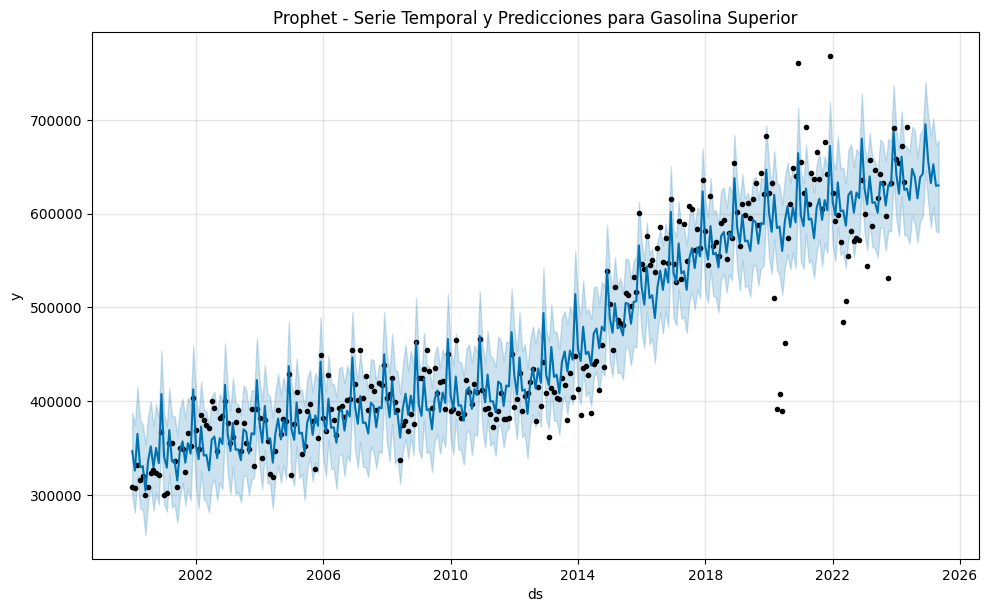

18:37:28 - cmdstanpy - INFO - Chain [1] start processing
18:37:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarr

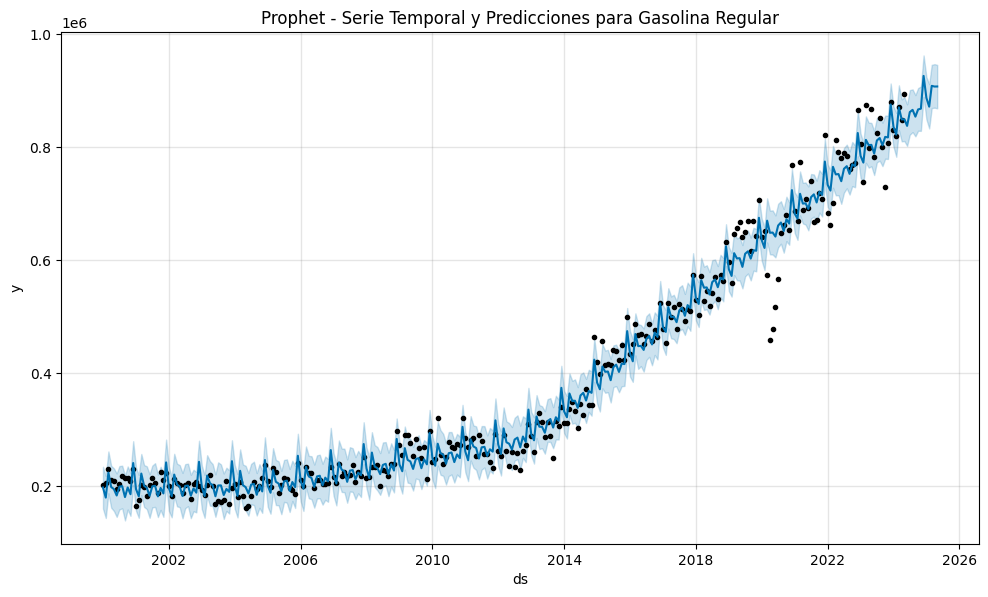

18:37:29 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarr

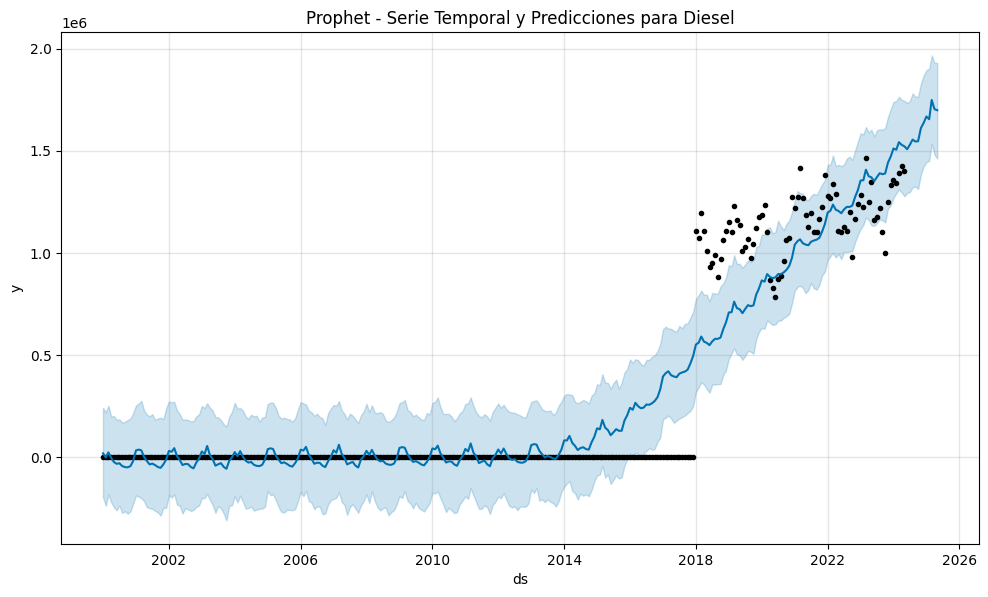

18:37:29 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarr

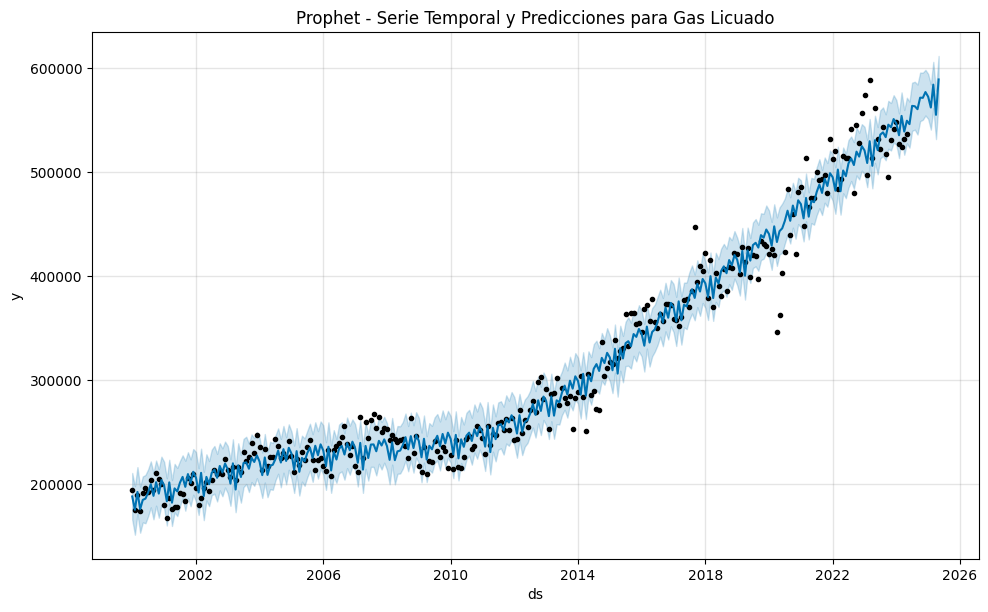

In [ ]:
from prophet import Prophet

def ajustar_prophet(serie, nombre):
    """
    Ajusta un modelo Prophet a la serie temporal dada y muestra un resumen del modelo seleccionado.

    Parameters:
    - serie: Serie temporal a ajustar.
    - nombre: Nombre para identificar la serie temporal.

    Returns:
    - modelo: El modelo Prophet ajustado.
    """
    # Preparar los datos para Prophet
    df_prophet = pd.DataFrame({
        'ds': serie.index,
        'y': serie.values
    })
    
    # Ajustar el modelo Prophet
    modelo_prophet = Prophet()
    modelo_prophet.fit(df_prophet)
    
    # Hacer predicciones
    futuro = modelo_prophet.make_future_dataframe(periods=12, freq='M')
    predicciones = modelo_prophet.predict(futuro)
    
    # Graficar los resultados
    fig = modelo_prophet.plot(predicciones)
    plt.title(f'Prophet - Serie Temporal y Predicciones para {nombre}')
    plt.show()

    return modelo_prophet, predicciones

# Ajustar y graficar modelos Prophet
modelo_gasolina_super_prophet, predicciones_gasolina_super_prophet = ajustar_prophet(serie_gasolina_super, "Gasolina Superior")
modelo_gasolina_regular_prophet, predicciones_gasolina_regular_prophet = ajustar_prophet(serie_gasolina_regular, "Gasolina Regular")
modelo_diesel_prophet, predicciones_diesel_prophet = ajustar_prophet(serie_diesel, "Diesel")
modelo_gas_lp_prophet, predicciones_gas_lp_prophet = ajustar_prophet(serie_gas_lp, "Gas Licuado")


In [ ]:
# Ajustar y graficar modelos Prophet para importación
modelo_gasolina_super_import_prophet, predicciones_gasolina_super_import_prophet = ajustar_prophet(serie_gasolina_super_import, "Gasolina Superior (Importación)")
modelo_gasolina_regular_import_prophet, predicciones_gasolina_regular_import_prophet = ajustar_prophet(serie_gasolina_regular_import, "Gasolina Regular (Importación)")
modelo_diesel_import_prophet, predicciones_diesel_import_prophet = ajustar_prophet(serie_diesel_import, "Diesel (Importación)")
modelo_gas_lp_import_prophet, predicciones_gas_lp_import_prophet = ajustar_prophet(serie_gas_lp_import, "Gas Licuado (Importación)")

In [ ]:
# Ajustar y graficar modelos Prophet para precios
modelo_gasolina_super_precios_prophet, predicciones_gasolina_super_precios_prophet = ajustar_prophet(serie_gasolina_super_precios, "Gasolina Superior (Precios)")
modelo_gasolina_regular_precios_prophet, predicciones_gasolina_regular_precios_prophet = ajustar_prophet(serie_gasolina_regular_precios, "Gasolina Regular (Precios)")
modelo_diesel_precios_prophet, predicciones_diesel_precios_prophet = ajustar_prophet(serie_diesel_precios, "Diesel (Precios)")
modelo_gas_lp_precios_prophet, predicciones_gas_lp_precios_prophet = ajustar_prophet(serie_gas_lp_precios, "Gas Licuado (Precios)")


### Comparación de Modelos

#### Gasolina Superior
- **MAE SARIMA:** 23936.81
- **RMSE SARIMA:** 37365.70
- **MAE Prophet:** 26229.59
- **RMSE Prophet:** 36749.65

**Conclusión:** El modelo SARIMA tiene un MAE menor y un RMSE menor que el modelo Prophet para la Gasolina Superior, indicando que el modelo SARIMA se ajusta mejor a los datos en términos de precisión y error de ajuste.

#### Gasolina Regular
- **MAE SARIMA:** 20963.65
- **RMSE SARIMA:** 31354.38
- **MAE Prophet:** 19552.11
- **RMSE Prophet:** 29531.59

**Conclusión:** El modelo Prophet supera al modelo SARIMA en la Gasolina Regular, con un MAE y RMSE menores, sugiriendo que Prophet ofrece una mejor precisión en la predicción para esta serie temporal.

#### Diesel
- **MAE SARIMA:** 23949.93
- **RMSE SARIMA:** 80983.75
- **MAE Prophet:** 110437.12
- **RMSE Prophet:** 175735.88

**Conclusión:** El modelo SARIMA proporciona mejores resultados tanto en MAE como en RMSE comparado con Prophet para Diesel. Esto sugiere que SARIMA es más adecuado para los datos de Diesel.

#### Gas Licuado
- **MAE SARIMA:** 13641.52
- **RMSE SARIMA:** 20918.59
- **MAE Prophet:** 12531.15
- **RMSE Prophet:** 17533.76

**Conclusión:** Prophet tiene un MAE y un RMSE menores que SARIMA para Gas Licuado, indicando que Prophet ofrece un mejor ajuste para esta serie temporal.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


def comparar_modelos(serie_original, predicciones_sarima, predicciones_prophet):
    """
    Compara las predicciones de los modelos SARIMA y Prophet.

    Parameters:
    - serie_original: Serie temporal original.
    - predicciones_sarima: Predicciones del modelo SARIMA.
    - predicciones_prophet: Predicciones del modelo Prophet.
    """
    # Calcular métricas de error para SARIMA
    mae_sarima = mean_absolute_error(serie_original, predicciones_sarima)
    rmse_sarima = np.sqrt(mean_squared_error(serie_original, predicciones_sarima))
    
    # Calcular métricas de error para Prophet
    mae_prophet = mean_absolute_error(serie_original, predicciones_prophet)
    rmse_prophet = np.sqrt(mean_squared_error(serie_original, predicciones_prophet))
    
    # Imprimir resultados
    print(f"MAE SARIMA: {mae_sarima:.2f}")
    print(f"RMSE SARIMA: {rmse_sarima:.2f}")
    
    print(f"MAE Prophet: {mae_prophet:.2f}")
    print(f"RMSE Prophet: {rmse_prophet:.2f}")

# Gasolina Superior
print("------------Gasolina Superior------------")
comparar_modelos(
    serie_gasolina_super,
    modelo_gasolina_super_sarima.predict_in_sample(),
    predicciones_gasolina_super_prophet['yhat'][:len(serie_gasolina_super)]
)

# Gasolina Regular
print("------------Gasolina Regular------------")
comparar_modelos(
    serie_gasolina_regular,
    modelo_gasolina_regular_sarima.predict_in_sample(),
    predicciones_gasolina_regular_prophet['yhat'][:len(serie_gasolina_regular)]
)

# Diesel
print("------------Diesel------------")
comparar_modelos(
    serie_diesel,
    modelo_diesel_sarima.predict_in_sample(),
    predicciones_diesel_prophet['yhat'][:len(serie_diesel)]
)

# Gas Licuado
print("------------Gas Licuado------------")
comparar_modelos(
    serie_gas_lp,
    modelo_gas_lp_sarima.predict_in_sample(),
    predicciones_gas_lp_prophet['yhat'][:len(serie_gas_lp)]
)



------------Gasolina Superior------------
MAE SARIMA: 23936.81
RMSE SARIMA: 37365.70
MAE Prophet: 26229.59
RMSE Prophet: 36749.65
------------Gasolina Regular------------
MAE SARIMA: 20963.65
RMSE SARIMA: 31354.38
MAE Prophet: 19552.11
RMSE Prophet: 29531.59
------------Diesel------------
MAE SARIMA: 23949.93
RMSE SARIMA: 80983.75
MAE Prophet: 110437.12
RMSE Prophet: 175735.88
------------Gas Licuado------------
MAE SARIMA: 13641.52
RMSE SARIMA: 20918.59
MAE Prophet: 12531.15
RMSE Prophet: 17533.76


In [ ]:
# Gasolina Superior
print("------------Gasolina Superior (Importación)------------")
comparar_modelos(
    serie_gasolina_super_import,
    modelo_gasolina_super_import.predict_in_sample(),
    predicciones_gasolina_super_import_prophet['yhat'][:len(serie_gasolina_super_import)]
)

# Gasolina Regular
print("------------Gasolina Regular (Importación)------------")
comparar_modelos(
    serie_gasolina_regular_import,
    modelo_gasolina_regular_import.predict_in_sample(),
    predicciones_gasolina_regular_import_prophet['yhat'][:len(serie_gasolina_regular_import)]
)

# Diesel
print("------------Diesel (Importación)------------")
comparar_modelos(
    serie_diesel_import,
    modelo_diesel_import.predict_in_sample(),
    predicciones_diesel_import_prophet['yhat'][:len(serie_diesel_import)]
)

# Gas Licuado
print("------------Gas Licuado (Importación)------------")
comparar_modelos(
    serie_gas_lp_import,
    modelo_gas_lp_import.predict_in_sample(),
    predicciones_gas_lp_import_prophet['yhat'][:len(serie_gas_lp_import)]
)

In [ ]:
# Gasolina Superior
print("------------Gasolina Superior (Precios)------------")
comparar_modelos(
    serie_gasolina_super_precios,
    modelo_gasolina_super_precios.predict_in_sample(),
    predicciones_gasolina_super_precios_prophet['yhat'][:len(serie_gasolina_super_precios)]
)

# Gasolina Regular
print("------------Gasolina Regular (Precios)------------")
comparar_modelos(
    serie_gasolina_regular_precios,
    modelo_gasolina_regular_precios.predict_in_sample(),
    predicciones_gasolina_regular_precios_prophet['yhat'][:len(serie_gasolina_regular_precios)]
)

# Diesel
print("------------Diesel (Precios)------------")
comparar_modelos(
    serie_diesel_precios,
    modelo_diesel_precios.predict_in_sample(),
    predicciones_diesel_precios_prophet['yhat'][:len(serie_diesel_precios)]
)

# Gas Licuado
print("------------Gas Licuado (Precios)------------")
comparar_modelos(
    serie_gas_lp_precios,
    modelo_gas_lp_precios.predict_in_sample(),
    predicciones_gas_lp_precios_prophet['yhat'][:len(serie_gas_lp_precios)]
)


## Predicciones 2024 con los modelos

In [ ]:
# Quitar los datos de 2024 para abajo de las series de tiempo
# Los test seran de 2024 en adelante
serie_gasolina_super_test = serie_gasolina_super['2021-01-01':]
serie_gasolina_regular_test = serie_gasolina_regular['2021-01-01':]
serie_diesel_test = serie_diesel['2021-01-01':]
serie_gas_lp_test = serie_gas_lp['2021-01-01':]

# Eliminar NaNs
serie_gasolina_super_test = serie_gasolina_super_test.dropna()
serie_gasolina_regular_test = serie_gasolina_regular_test.dropna()
serie_diesel_test = serie_diesel_test.dropna()
serie_gas_lp_test = serie_gas_lp_test.dropna()


# Remplazamos las series por las que tienen los datos de 2024 para abajo
serie_gasolina_super = serie_gasolina_super[:'2020-12-31']
serie_gasolina_regular = serie_gasolina_regular[:'2020-12-31']
serie_diesel = serie_diesel[:'2020-12-31']
serie_gas_lp = serie_gas_lp[:'2020-12-31']


In [ ]:
# Quitar los datos de 2024 para abajo de las series de importación
# Los test seran de 2024 en adelante
serie_gasolina_super_import_test = serie_gasolina_super_import['2021-01-01':]
serie_gasolina_regular_import_test = serie_gasolina_regular_import['2021-01-01':]
serie_diesel_import_test = serie_diesel_import['2021-01-01':]
serie_gas_lp_import_test = serie_gas_lp_import['2021-01-01':]

# Eliminar NaNs
serie_gasolina_super_import_test = serie_gasolina_super_import_test.dropna()
serie_gasolina_regular_import_test = serie_gasolina_regular_import_test.dropna()
serie_diesel_import_test = serie_diesel_import_test.dropna()
serie_gas_lp_import_test = serie_gas_lp_import_test.dropna()

# Remplazamos las series por las que tienen los datos de 2024 para abajo
serie_gasolina_super_import = serie_gasolina_super_import[:'2020-12-31']
serie_gasolina_regular_import = serie_gasolina_regular_import[:'2020-12-31']
serie_diesel_import = serie_diesel_import[:'2020-12-31']
serie_gas_lp_import = serie_gas_lp_import[:'2020-12-31']

In [ ]:
# Quitar los datos de 2024 para abajo de las series de precios
# Los test seran de 2024 en adelante
serie_gasolina_super_precios_test = serie_gasolina_super_precios['2024-01-01':]
serie_gasolina_regular_precios_test = serie_gasolina_regular_precios['2024-01-01':]
serie_diesel_precios_test = serie_diesel_precios['2024-01-01':]
serie_gas_lp_precios_test = serie_gas_lp_precios['2024-01-01':]

# Eliminar NaNs
serie_gasolina_super_precios_test = serie_gasolina_super_precios_test.dropna()
serie_gasolina_regular_precios_test = serie_gasolina_regular_precios_test.dropna()
serie_diesel_precios_test = serie_diesel_precios_test.dropna()
serie_gas_lp_precios_test = serie_gas_lp_precios_test.dropna()

# Remplazamos las series por las que tienen los datos de 2024 para abajo
serie_gasolina_super_precios = serie_gasolina_super_precios[:'2023-12-31']
serie_gasolina_regular_precios = serie_gasolina_regular_precios[:'2023-12-31']
serie_diesel_precios = serie_diesel_precios[:'2023-12-31']
serie_gas_lp_precios = serie_gas_lp_precios[:'2023-12-31']

-------------------Gasolina Superior---------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5927.652, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6025.083, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5950.168, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5962.946, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6023.617, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5963.161, Time=0.75 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=5948.986, Time=1.98 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=5928.822, Time=5.66 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5928.969, Time=1.77 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=5956.625, Time=0.47 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5955.761, Time=5.63 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=5941.364, Time=1.23 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.65 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : 

c:\Users\danar\Documents\Clases 2024-2\DS\Time_Series\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5678.687, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.457, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5617.163, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5677.536, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5617.657, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5618.603, Time=0.20 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=5612.639, Time=0.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=5614.024, Time=0.27 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=5665.768, Time=0.11 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5613.835, Time=0.29 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=5614.825, Time=0.21 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=5616.984, Time=0.17 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=5614.932, Time=0.41 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=5612.286, Time=0.14 sec


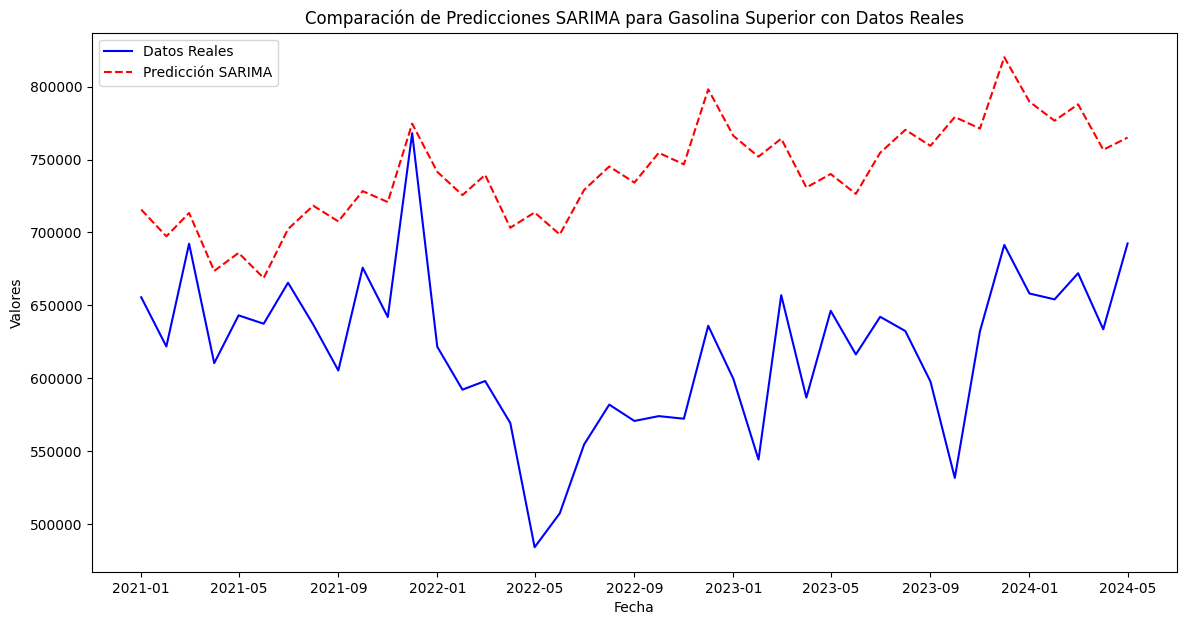

-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------


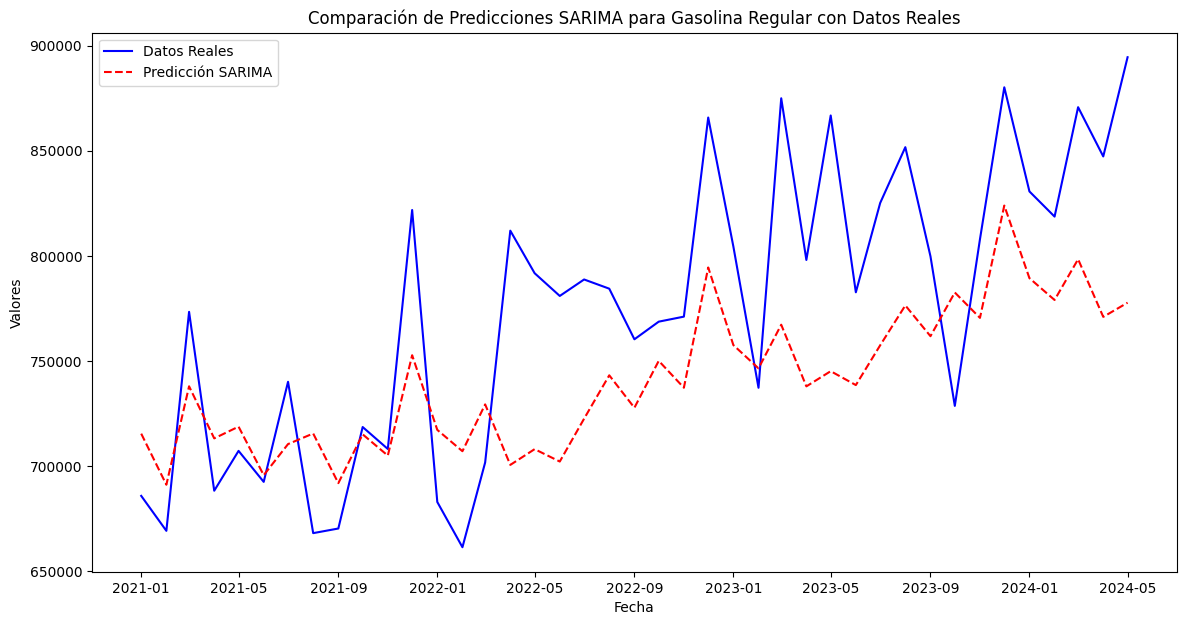

-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------


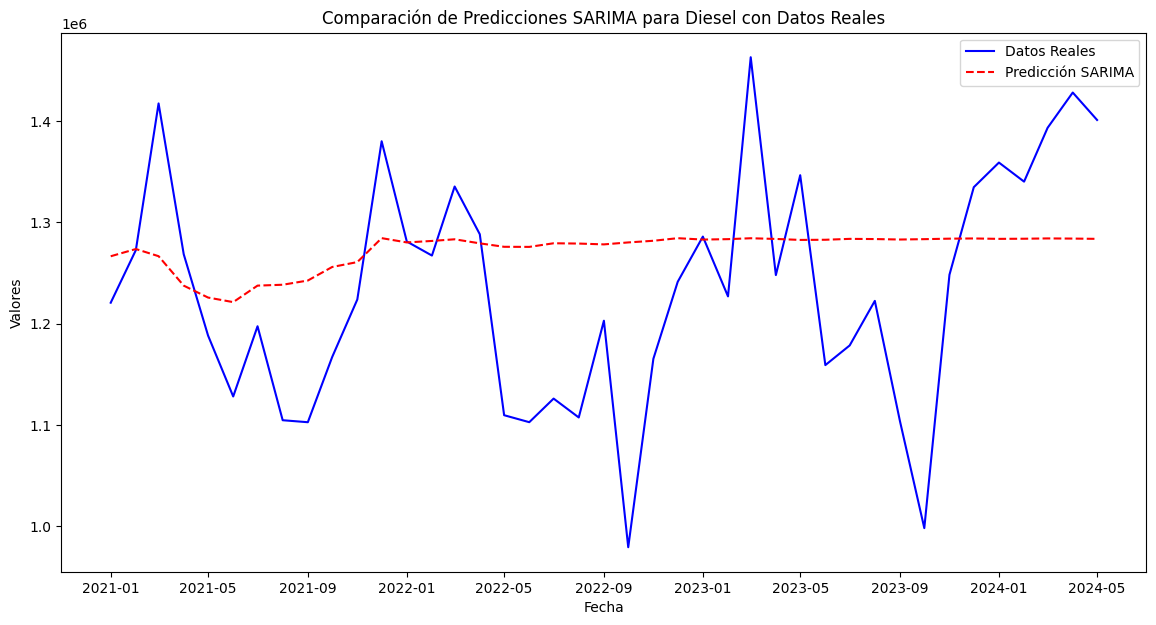

-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------


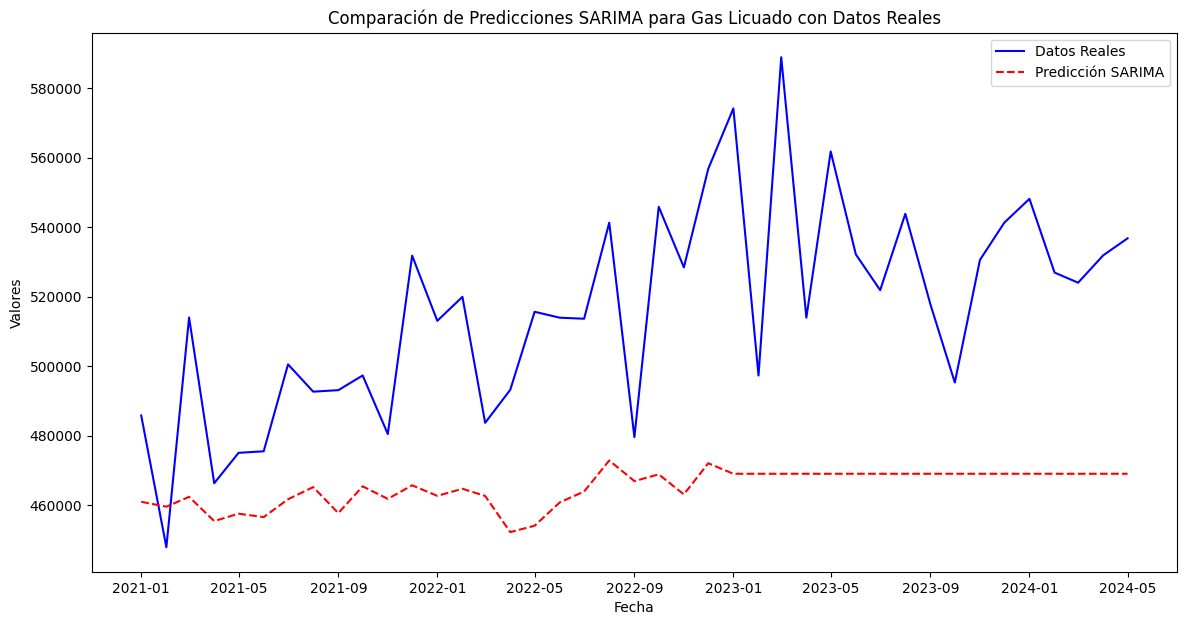

In [ ]:
def aplicar_auto_arima(serie, nombre, periodo_estacional):
    """
    Ajusta un modelo SARIMA a la serie temporal dada y muestra un resumen del modelo seleccionado.

    Parameters:
    - serie: Serie temporal a ajustar.
    - nombre: Nombre para identificar la serie temporal.
    - periodo_estacional: Periodo estacional de la serie temporal (por ejemplo, 12 para datos mensuales con estacionalidad anual).

    Returns:
    - modelo: El modelo SARIMA ajustado.
    """
    modelo = pm.auto_arima(
        serie,
        seasonal=True,           # Ajusta un modelo SARIMA
        m=periodo_estacional,   # Periodo estacional
        trace=True,             # Muestra el progreso del ajuste
        error_action='ignore',  # Ignora errores durante el ajuste
        suppress_warnings=True  # Suprime advertencias durante el ajuste
    )
    print(f'Modelo seleccionado para {nombre}:')
    print(modelo.summary())
    return modelo

# Ajustar modelos SARIMA con datos de entrenamiento
print("-------------------Gasolina Superior---------------")
modelo_gasolina_super_sarima = aplicar_auto_arima(serie_gasolina_super, "Gasolina Superior", periodo_estacional=12)
print("-------------------Gasolina Regular---------------")
modelo_gasolina_regular_sarima = aplicar_auto_arima(serie_gasolina_regular, "Gasolina Regular", periodo_estacional=12)
print("-------------------Diesel---------------")
modelo_diesel_sarima = aplicar_auto_arima(serie_diesel, "Diesel", periodo_estacional=12)
print("-------------------Gas Licuado---------------")
modelo_gas_lp_sarima = aplicar_auto_arima(serie_gas_lp, "Gas Licuado", periodo_estacional=12)

# Hacer predicciones para los datos de prueba (últimos 3 años)
def predecir_ultimos_3_anos_sarima(modelo, periodo_prueba):
    predicciones = modelo.predict(n_periods=periodo_prueba)
    return predicciones


print()
print() 
print("-----------------------Predicciones para Gasolina Superior------------------")
# Generar predicciones
predicciones_gasolina_super_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_super_sarima, len(serie_gasolina_super_test))
print("-----------------------Predicciones para Gasolina Regular------------------")
predicciones_gasolina_regular_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_regular_sarima, len(serie_gasolina_regular_test))
print("-----------------------Predicciones para Diesel------------------")
predicciones_diesel_sarima = predecir_ultimos_3_anos_sarima(modelo_diesel_sarima, len(serie_diesel_test))
print("-----------------------Predicciones para Gas Licuado------------------")
predicciones_gas_lp_sarima = predecir_ultimos_3_anos_sarima(modelo_gas_lp_sarima, len(serie_gas_lp_test))

# Comparar con los datos reales
def comparar_predicciones_con_reales(predicciones, datos_reales, nombre_serie):
    plt.figure(figsize=(14, 7))
    plt.plot(datos_reales.index, datos_reales, label='Datos Reales', color='blue')
    plt.plot(predicciones.index, predicciones, label='Predicción SARIMA', color='red', linestyle='--')
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.title(f'Comparación de Predicciones SARIMA para {nombre_serie} con Datos Reales')
    plt.legend()
    plt.show()

print()
print()
# Comparar las predicciones SARIMA con los datos reales de 2024
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_super_sarima, serie_gasolina_super_test, "Gasolina Superior")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_regular_sarima, serie_gasolina_regular_test, "Gasolina Regular")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_diesel_sarima, serie_diesel_test, "Diesel")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gas_lp_sarima, serie_gas_lp_test, "Gas Licuado")


In [ ]:
# Ajustar modelos SARIMA con datos de importación
print("-------------------Gasolina Superior (Importación)---------------")
modelo_gasolina_super_import_sarima = aplicar_auto_arima(serie_gasolina_super_import, "Gasolina Superior (Importación)", periodo_estacional=12)
print("-------------------Gasolina Regular (Importación)---------------")
modelo_gasolina_regular_import_sarima = aplicar_auto_arima(serie_gasolina_regular_import, "Gasolina Regular (Importación)", periodo_estacional=12)
print("-------------------Diesel (Importación)---------------")
modelo_diesel_import_sarima = aplicar_auto_arima(serie_diesel_import, "Diesel (Importación)", periodo_estacional=12)
print("-------------------Gas Licuado (Importación)---------------")
modelo_gas_lp_import_sarima = aplicar_auto_arima(serie_gas_lp_import, "Gas Licuado (Importación)", periodo_estacional=12)

# Generar predicciones para los datos de prueba (últimos 3 años)
predicciones_gasolina_super_import_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_super_import_sarima, len(serie_gasolina_super_import_test))
predicciones_gasolina_regular_import_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_regular_import_sarima, len(serie_gasolina_regular_import_test))
predicciones_diesel_import_sarima = predecir_ultimos_3_anos_sarima(modelo_diesel_import_sarima, len(serie_diesel_import_test))
predicciones_gas_lp_import_sarima = predecir_ultimos_3_anos_sarima(modelo_gas_lp_import_sarima, len(serie_gas_lp_import_test))

# Comparar con los datos reales de 2024
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_super_import_sarima, serie_gasolina_super_import_test, "Gasolina Superior (Importación)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_regular_import_sarima, serie_gasolina_regular_import_test, "Gasolina Regular (Importación)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_diesel_import_sarima, serie_diesel_import_test, "Diesel (Importación)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gas_lp_import_sarima, serie_gas_lp_import_test, "Gas Licuado (Importación)")

In [ ]:
# Ajustar modelos SARIMA con datos de precios
print("-------------------Gasolina Superior (Precios)---------------")
modelo_gasolina_super_precios_sarima = aplicar_auto_arima(serie_gasolina_super_precios, "Gasolina Superior (Precios)", periodo_estacional=12)
print("-------------------Gasolina Regular (Precios)---------------")
modelo_gasolina_regular_precios_sarima = aplicar_auto_arima(serie_gasolina_regular_precios, "Gasolina Regular (Precios)", periodo_estacional=12)
print("-------------------Diesel (Precios)---------------")
modelo_diesel_precios_sarima = aplicar_auto_arima(serie_diesel_precios, "Diesel (Precios)", periodo_estacional=12)
print("-------------------Gas Licuado (Precios)---------------")
modelo_gas_lp_precios_sarima = aplicar_auto_arima(serie_gas_lp_precios, "Gas Licuado (Precios)", periodo_estacional=12)

# Generar predicciones para los datos de prueba (últimos 3 años)
predicciones_gasolina_super_precios_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_super_precios_sarima, len(serie_gasolina_super_precios_test))
predicciones_gasolina_regular_precios_sarima = predecir_ultimos_3_anos_sarima(modelo_gasolina_regular_precios_sarima, len(serie_gasolina_regular_precios_test))
predicciones_diesel_precios_sarima = predecir_ultimos_3_anos_sarima(modelo_diesel_precios_sarima, len(serie_diesel_precios_test))
predicciones_gas_lp_precios_sarima = predecir_ultimos_3_anos_sarima(modelo_gas_lp_precios_sarima, len(serie_gas_lp_precios_test))

# Comparar con los datos reales de 2024
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_super_precios_sarima, serie_gasolina_super_precios_test, "Gasolina Superior (Precios)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gasolina_regular_precios_sarima, serie_gasolina_regular_precios_test, "Gasolina Regular (Precios)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_diesel_precios_sarima, serie_diesel_precios_test, "Diesel (Precios)")
print("-----------------------Comparación de Predicciones SARIMA con Datos Reales de 2024------------------")
comparar_predicciones_con_reales(predicciones_gas_lp_precios_sarima, serie_gas_lp_precios_test, "Gas Licuado (Precios)")


In [ ]:
# Realizar predicciones para todo el 2024
def predecir_2024_sarima(modelo, serie, periodo_prueba):
    # Ajustar el modelo SARIMA
    modelo.fit(serie)
    
    # Hacer predicciones
    predicciones = modelo.predict(n_periods=periodo_prueba)
    
    return predicciones

mothsBetween2021_2024 = 12*4
# Realizar predicciones para todo el 2024
predicciones_gasolina_super_sarima = predecir_2024_sarima(modelo_gasolina_super_sarima, serie_gasolina_super, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_super_sarima = predicciones_gasolina_super_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_gasolina_regular_sarima = predecir_2024_sarima(modelo_gasolina_regular_sarima, serie_gasolina_regular, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_regular_sarima = predicciones_gasolina_regular_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_diesel_sarima = predecir_2024_sarima(modelo_diesel_sarima, serie_diesel, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_diesel_sarima = predicciones_diesel_sarima[12*3:]


# Grafica de las predicciones para el 2024
def graficar_predicciones_2024_sarima(predicciones, nombre_serie):
    plt.figure(figsize=(14, 7))
    plt.plot(predicciones.index, predicciones, label='Predicciones SARIMA', color='red', linestyle='--')
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.title(f'Predicciones SARIMA para {nombre_serie} en 2024')
    plt.legend()
    plt.show()

print()
print()
# Graficar las predicciones SARIMA para el 2024
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_super_sarima, "Gasolina Superior")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_regular_sarima, "Gasolina Regular")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_diesel_sarima, "Diesel")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gas_lp_sarima, "Gas Licuado")

In [ ]:
# Importaciones
# Realizar predicciones para todo el 2024
predicciones_gasolina_super_import_sarima = predecir_2024_sarima(modelo_gasolina_super_import_sarima, serie_gasolina_super_import, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_super_import_sarima = predicciones_gasolina_super_import_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_gasolina_regular_import_sarima = predecir_2024_sarima(modelo_gasolina_regular_import_sarima, serie_gasolina_regular_import, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_regular_import_sarima = predicciones_gasolina_regular_import_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_diesel_import_sarima = predecir_2024_sarima(modelo_diesel_import_sarima, serie_diesel_import, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_diesel_import_sarima = predicciones_diesel_import_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_gas_lp_import_sarima = predecir_2024_sarima(modelo_gas_lp_import_sarima, serie_gas_lp_import, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gas_lp_import_sarima = predicciones_gas_lp_import_sarima[12*3:]


# Grafica de las predicciones para el 2024
print()
print()
# Graficar las predicciones SARIMA para el 2024
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_super_import_sarima, "Gasolina Superior (Importación)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_regular_import_sarima, "Gasolina Regular (Importación)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_diesel_import_sarima, "Diesel (Importación)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gas_lp_import_sarima, "Gas Licuado (Importación)")

In [ ]:
# Precios
# Realizar predicciones para todo el 2024
predicciones_gasolina_super_precios_sarima = predecir_2024_sarima(modelo_gasolina_super_precios_sarima, serie_gasolina_super_precios, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_super_precios_sarima = predicciones_gasolina_super_precios_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_gasolina_regular_precios_sarima = predecir_2024_sarima(modelo_gasolina_regular_precios_sarima, serie_gasolina_regular_precios, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gasolina_regular_precios_sarima = predicciones_gasolina_regular_precios_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_diesel_precios_sarima = predecir_2024_sarima(modelo_diesel_precios_sarima, serie_diesel_precios, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_diesel_precios_sarima = predicciones_diesel_precios_sarima[12*3:]

# Realizar predicciones para todo el 2024
predicciones_gas_lp_precios_sarima = predecir_2024_sarima(modelo_gas_lp_precios_sarima, serie_gas_lp_precios, mothsBetween2021_2024)
# Obtener las fechas para el 2024, los ultimos 12 registros
predicciones_gas_lp_precios_sarima = predicciones_gas_lp_precios_sarima[12*3:]


# Grafica de las predicciones para el 2024
print()
print()
# Graficar las predicciones SARIMA para el 2024
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_super_precios_sarima, "Gasolina Superior (Precios)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gasolina_regular_precios_sarima, "Gasolina Regular (Precios)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_diesel_precios_sarima, "Diesel (Precios)")
print("-----------------------Predicciones SARIMA para el 2024------------------")
graficar_predicciones_2024_sarima(predicciones_gas_lp_precios_sarima, "Gas Licuado (Precios)")